Connecting Google Colab to Kaggle Account

In [ ]:
!pip install kaggle

In [2]:
import os
os.environ['KAGGLE_USERNAME']="bhaskarkulshrestha"
os.environ['KAGGLE_KEY']='41381c0e6d7faeea0ffbdeb70432c460'

**Download the Dataset from Kaggle**

In [ ]:
# prompt: Download the dataset from kaggle

!kaggle datasets download tawsifurrahman/covid19-radiography-database


**Extract the Zip folder**

In [ ]:
# prompt: unzip the folder

!unzip covid19-radiography-database.zip


get the length of list of all files and directories in the specified directory.

In [3]:
# len(os.listdir('/COVID-19_Radiography_Dataset/COVID/images'))
len(os.listdir('/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/COVID/images'))

3616

In [4]:
len(os.listdir('/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/Normal/images/'))

10192

*Here the number of normal images and COVID images is unbalanced so we have to balance them*

*cv2 module is the main module in OpenCV that provides developers with an easy-to-use interface for working with image and video processing functions*

In [5]:
import cv2

In [11]:
img=cv2.imread('/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/Normal/images/Normal-10000.png')

*The imread() function is part of the matplotlib.pyplot library. It reads an image and stores it as an array.*

In [12]:
import matplotlib.pyplot as plt

*Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python*

What is the purpose of the Imshow () function in Matplotlib ?

Display data as an image, i.e., on a 2D regular raster. The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image

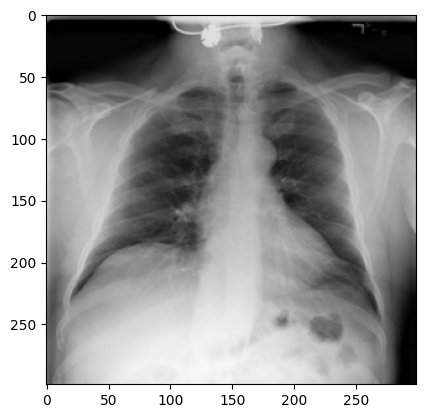

In [13]:
plt.imshow(img)

In [14]:
img.shape

(299, 299, 3)

img.shape() shows the dimension of the image

In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_excel('/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [17]:
df.head(10)

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
5,COVID-6,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
6,COVID-7,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
7,COVID-8,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
8,COVID-9,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
9,COVID-10,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [18]:
os.listdir('/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/COVID/images')

['COVID-1994.png',
 'COVID-1825.png',
 'COVID-517.png',
 'COVID-532.png',
 'COVID-2272.png',
 'COVID-765.png',
 'COVID-699.png',
 'COVID-1857.png',
 'COVID-3190.png',
 'COVID-774.png',
 'COVID-3113.png',
 'COVID-2563.png',
 'COVID-562.png',
 'COVID-2100.png',
 'COVID-2441.png',
 'COVID-2226.png',
 'COVID-1586.png',
 'COVID-2101.png',
 'COVID-3397.png',
 'COVID-415.png',
 'COVID-744.png',
 'COVID-258.png',
 'COVID-3032.png',
 'COVID-2424.png',
 'COVID-953.png',
 'COVID-2494.png',
 'COVID-1300.png',
 'COVID-2856.png',
 'COVID-2768.png',
 'COVID-1859.png',
 'COVID-1089.png',
 'COVID-2086.png',
 'COVID-2695.png',
 'COVID-2875.png',
 'COVID-1007.png',
 'COVID-1762.png',
 'COVID-46.png',
 'COVID-894.png',
 'COVID-107.png',
 'COVID-1399.png',
 'COVID-624.png',
 'COVID-39.png',
 'COVID-1138.png',
 'COVID-647.png',
 'COVID-1309.png',
 'COVID-843.png',
 'COVID-2433.png',
 'COVID-2293.png',
 'COVID-1454.png',
 'COVID-307.png',
 'COVID-3576.png',
 'COVID-2775.png',
 'COVID-1824.png',
 'COVID-2996.

THE ABOVE CODE WILL GIVE THE NAMES OF ALL THE FILES PRESENT IN THE GIVEN DIRECTORY

In [19]:
urls = os.listdir('/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/COVID/images')

In [20]:
path = "/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/COVID/images"+urls[0]

In [21]:
path

'/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/COVID/imagesCOVID-1994.png'

In [22]:
def loadImages(path, urls, target):
  """Loads images from a directory and resizes them.

  Args:
      path: Path to the directory containing images.
      urls: List of image filenames.
      target: Label (0 or 1) for the images in this directory.

  Returns:
      A tuple containing:
          images: A NumPy array of loaded images.
          labels: A NumPy array of labels for the images.
  """

  images = []
  labels = []
  for i in range(len(urls)):
    img_path = os.path.join(path, urls[i])  # Use os.path.join for safer path construction
    img = cv2.imread(img_path)
    img = img/255.0  # Normalize pixel values

    # Resize images if desired (uncomment the following line)
    img = cv2.resize(img, (100, 100))

    images.append(img)
    labels.append(target)

  images = np.asarray(images)
  return images, labels

In [24]:
covid_path="/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/COVID/images"
covidUrl=os.listdir(covid_path)
covidImages,covidTargets=loadImages(covid_path,covidUrl,1)

In [25]:
normal_path="/kaggle/input/covid-19-radiography-dataset/COVID-19_Radiography_Dataset/Normal/images"
normal_urls=os.listdir(normal_path)
normalImages,normalTargets=loadImages(normal_path,normal_urls,0)

In [26]:
normalImages

array([[[[2.35098039e-02, 2.35098039e-02, 2.35098039e-02],
         [1.96274510e-02, 1.96274510e-02, 1.96274510e-02],
         [2.35294118e-02, 2.35294118e-02, 2.35294118e-02],
         ...,
         [2.73534314e-02, 2.73534314e-02, 2.73534314e-02],
         [2.74509804e-02, 2.74509804e-02, 2.74509804e-02],
         [2.74313725e-02, 2.74313725e-02, 2.74313725e-02]],

        [[1.96078431e-02, 1.96078431e-02, 1.96078431e-02],
         [1.96078431e-02, 1.96078431e-02, 1.96078431e-02],
         [1.97617647e-02, 1.97617647e-02, 1.97617647e-02],
         ...,
         [2.35308824e-02, 2.35308824e-02, 2.35308824e-02],
         [2.74500980e-02, 2.74500980e-02, 2.74500980e-02],
         [2.74313725e-02, 2.74313725e-02, 2.74313725e-02]],

        [[1.95882353e-02, 1.95882353e-02, 1.95882353e-02],
         [1.96078431e-02, 1.96078431e-02, 1.96078431e-02],
         [1.96078431e-02, 1.96078431e-02, 1.96078431e-02],
         ...,
         [2.35294118e-02, 2.35294118e-02, 2.35294118e-02],
         [

In [33]:
# covidImages=np.asarray(covidImages)
# normalImages=np.asarray(normalImages)

In [34]:
covidImages.shape
#NumPy array representing images with dimensions (height, width, channels),
#then covidImages.shape would return a tuple like (height, width, channels).

(3616, 100, 100, 3)

IF ALL THE IMAGES HAVE THE SAME DIMENSIONS THEN EXPECT THAT IT WOULD RETURN:

*(How many number of data you have OR The shape of the data, Number of Rows ,number of coloumns, color channel )*

In [35]:
normalImages.shape

(10192, 100, 100, 3)

**For the next process we have to make sure that normalImages and covidImages are together in a single variable.**

In [36]:
data = np.r_[covidImages,normalImages]

#concatenate two NumPy arrays covidImages and normalImages along their first axis.

In [37]:
data.shape

(13808, 100, 100, 3)

In [38]:
targets=np.r_[covidTargets,normalTargets]

In [39]:
targets.shape

(13808,)

Now we divide the training and testing part.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test =train_test_split(data,targets,test_size=0.25)

**Now we build the Tensorflow Model.**

In [42]:
import tensorflow as tf

2024-03-13 10:04:27.175420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 10:04:27.175563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 10:04:27.373796: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


------------------------------------------------------------------------------

In TensorFlow, specifically within the Keras library, "sequential" refers to two things:

  * **Sequential Model:** This is a specific type of neural network architecture created using the `tf.keras.Sequential` class. It's designed for building models by stacking layers one after another in a linear fashion. Each layer in the sequence only receives the output from the previous layer.

  * **Sequential API:** This is a way of defining and building Sequential models. It provides a simple and intuitive syntax for adding layers to your model step-by-step. The Sequential API is a great starting point for beginners in deep learning because of its ease of use.

Here are some key points about Sequential models:

* **Simpler architectures:** They are well-suited for building models with a linear flow of data, where each layer transforms the output from the prior layer.
* **Limited complexity:** Sequential models cannot handle architectures with multiple inputs, outputs, or branching layers.
* **Efficient for beginners:** The Sequential API makes it straightforward to define and train these simpler models.

If you're new to TensorFlow and deep learning, starting with Sequential models and the Sequential API is a recommended approach. As you get more comfortable, you can explore other model creation methods like the Functional API that offer more flexibility for complex architectures.

In [43]:
from tensorflow.keras.models import Sequential

# 4 layers that wwe need for outr Model.
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [92]:
model=Sequential([
    #Conv2D(Filters,kernel_size,input_shape => (width,height,colour channel),activation Function,Padding)
    Conv2D(32,3,input_shape=(100,100,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    
    # CNN Architecture till Here.
    
    # Flatten becomes the input layer that contains all the neurons
    Flatten(),
    
    # Now we will pass the Hidden Layer
    #Dense(Number of Neuron,activation /function)
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    
    #Final Output Layer
    #Dense(number of output,activation function),
    
    Dense(1,activation='sigmoid')

    #For number of outputs neurons:
    #for 2 output => activation function is softmax
    #for 1 output => activation function is sigmoid
    
])

In [93]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 47, 47, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 21, 21, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 10, 10, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 959,137 (3.66 MB)

 Trainable params: 959,137 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

**Now Compile the model.**

In [94]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

**Training the Model**

In [95]:
model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
 20/324 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6706 - loss: 0.6086

W0000 00:00:1710327696.742162    1162 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7730 - loss: 0.4720

W0000 00:00:1710327700.067925    1160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710327701.568769    1160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7732 - loss: 0.4717 - val_accuracy: 0.8592 - val_loss: 0.3061
Epoch 2/5
 15/324 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8790 - loss: 0.2727

W0000 00:00:1710327702.166892    1160 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8882 - loss: 0.2581 - val_accuracy: 0.9154 - val_loss: 0.2088
Epoch 3/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9264 - loss: 0.1909 - val_accuracy: 0.9015 - val_loss: 0.2237
Epoch 4/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9327 - loss: 0.1660 - val_accuracy: 0.9287 - val_loss: 0.1860
Epoch 5/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9437 - loss: 0.1473 - val_accuracy: 0.9087 - val_loss: 0.2261


# **Plotting the Graph**

**Training Data**

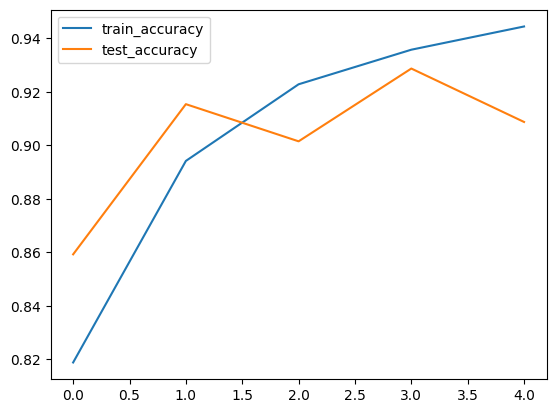

In [96]:
plt.plot(model.history.history['accuracy'],label='train_accuracy')
plt.plot(model.history.history['val_accuracy'],label='test_accuracy')
plt.legend()
plt.show()

**Testing Data**

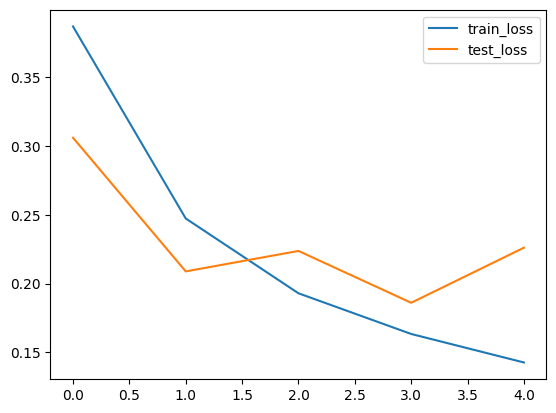

In [97]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='test_loss')
plt.legend()
plt.show()